In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import  PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [74]:
df = pd.read_csv('/content/drive/MyDrive/ExcelR/Assignments/wine.csv')

In [75]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [76]:
df.shape

(178, 14)

In [77]:
df['Type'].value_counts()

,count
Type,
2,71
1,59
3,48


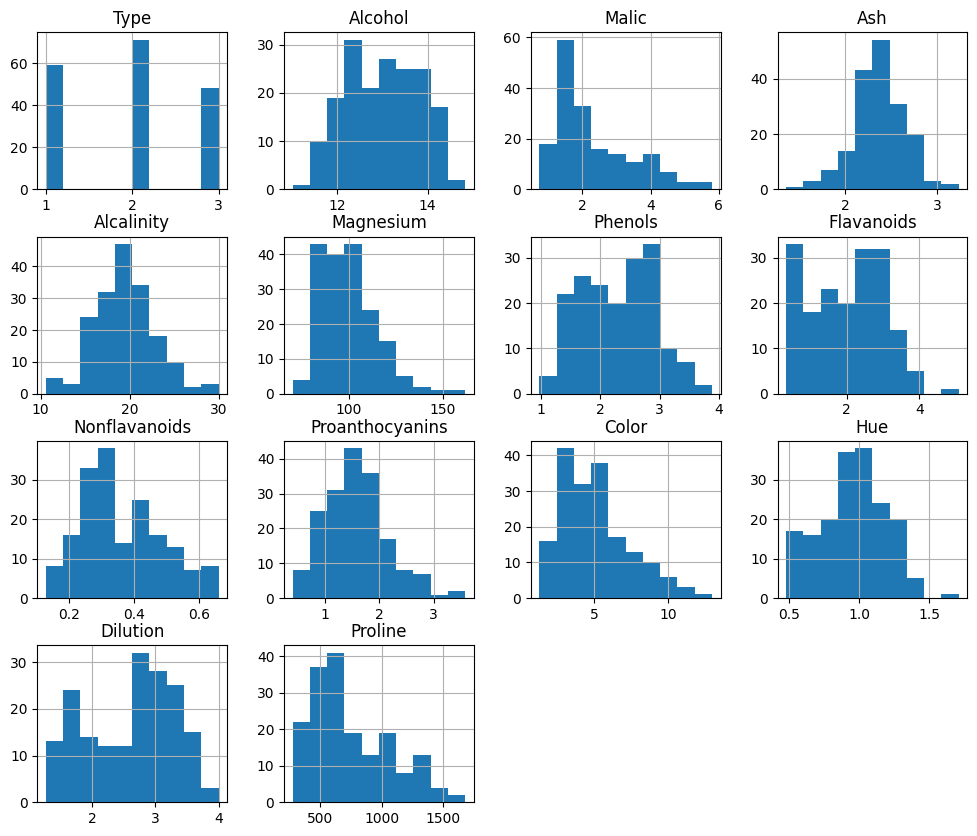

In [78]:
df.hist(figsize=(12,10))
plt.show()

<Axes: >

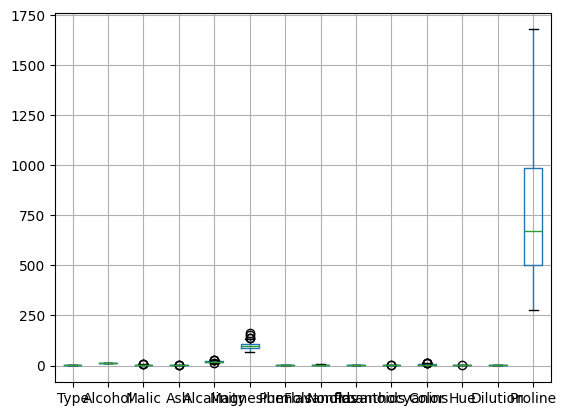

In [79]:
df.boxplot()

In [80]:
def outliers(data):
  data_num = data.select_dtypes(include = 'number')

  for col in data_num:
      q1 = data[col].quantile(0.25)
      q3 = data[col].quantile(0.75)

      IQR = q3-q1
      lower_bound = q1 - 1.5*IQR
      upper_bound = q3 + 1.5*IQR

      data[col] = np.where(data[col] < lower_bound, lower_bound,
                      np.where(data[col] > upper_bound, upper_bound, data[col]))

  return data

In [81]:
df = outliers(df)

<Axes: >

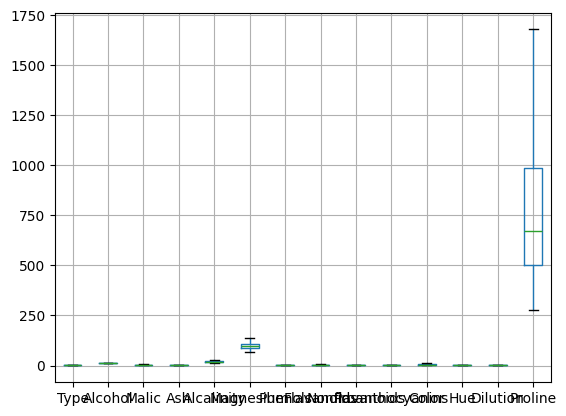

In [82]:
df.boxplot()

<Axes: >

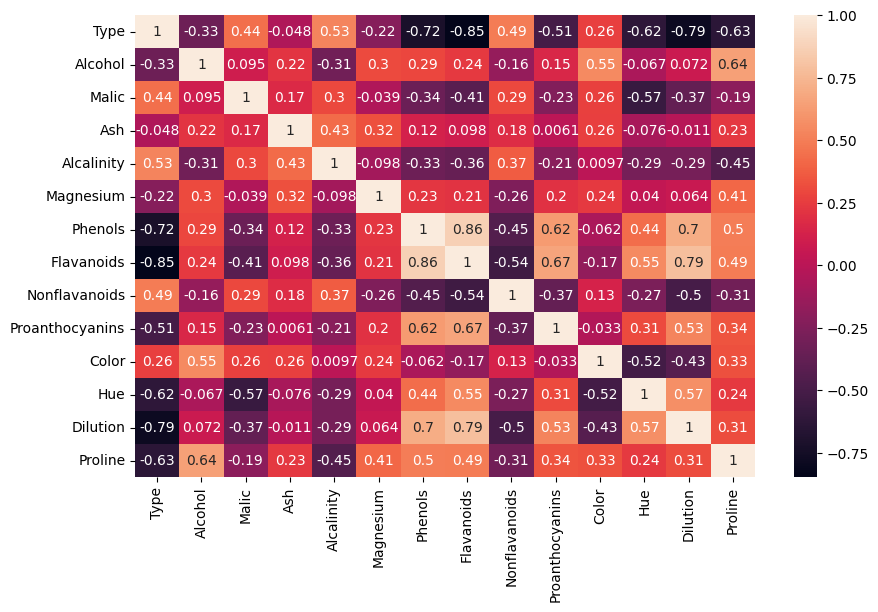

In [83]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

## **Strong Negative Correlations with Type**

* **Flavanoids (−0.847):** This is the strongest correlation.
* **Dilution (−0.788):** Similar to Flavanoids, as the 'Type' value increases, the Dilution value significantly decreases.
* **Phenols (−0.719):** The total Phenols also shows a strong tendency to decrease as the 'Type' value increases.

## Strong Positive Correlation
* **Flavanoids vs. Phenols (+0.865):** This is the strongest inter-feature correlation.
* **Flavanoids vs. Dilution (+0.787):** There's a strong positive relationship between Flavanoids and the Dilution
* **Phenols vs. Dilution (+0.700):** Following the relationships above, it's logical that Total Phenols and Dilution also show a strong positive correlation.

## **Moderate Correlation**

* **Alcohol vs. Proline (+0.644):** Wines with a higher Alcohol content tend to have a higher concentration of the amino acid Proline. Proline is often associated with the quality and body of the wine.
* **Hue vs. Flavanoids (+0.547)**: The Hue is moderately positively correlated with Flavanoids
* **Color vs. Alcohol (+0.549):** Wines with higher Alcohol content also tend to have a higher Color intensity.
* **Malic vs. Hue (−0.566):** Malic Acid concentration has a moderately strong negative correlation with Hue.

In [84]:
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(df),columns=df.columns)

In [85]:
df_scaled.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,-1.213944,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,-1.213944,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,-1.213944,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,-1.213944,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


In [86]:
pca = PCA(n_components=None)
pca.fit(df_scaled)

PCA()

In [87]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Explained Variance Ratio per PC:", explained_variance_ratio)


Explained Variance Ratio per PC: [0.39807866 0.18209648 0.1013214  0.06619413 0.05983257 0.04726317
 0.03753501 0.02554538 0.02108632 0.01880492 0.01630103 0.01233512
 0.00955758 0.00404823]


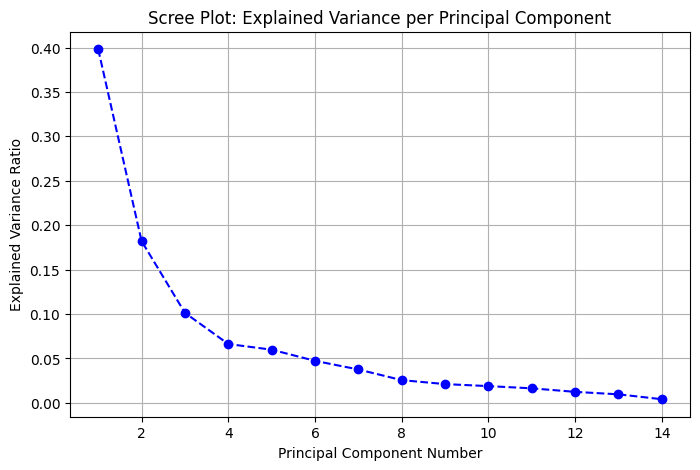

In [88]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio,
         marker='o', linestyle='--', color='blue')
plt.title('Scree Plot: Explained Variance per Principal Component')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


**Optimal Number (Scree Plot): 3 or 4 components.**

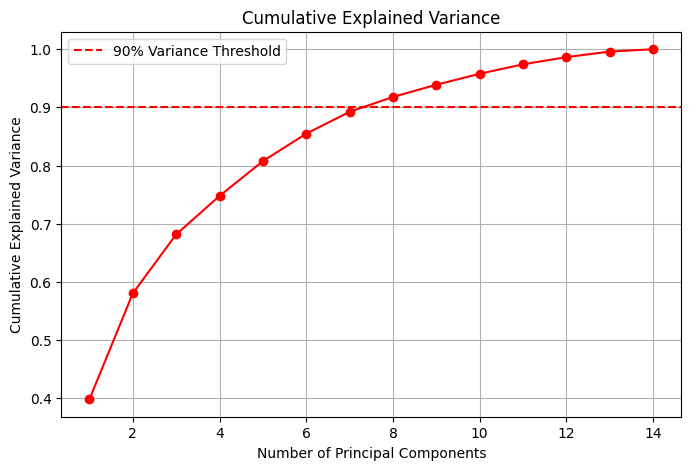


Minimum number of components to explain 90% variance: 8


In [89]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance,
         marker='o', linestyle='-', color='red')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

n_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1

print(f"\nMinimum number of components to explain 90% variance: {n_components_90}")

**For 90% Variance: need 8 components to capture over 90% of the total variance.**

In [90]:
pca1=PCA(n_components=8)
pca2 = PCA(n_components=4)

In [91]:
pca1.fit(df_scaled)
pca2.fit(df_scaled)

PCA(n_components=4)

In [92]:
pca_cumulative = pca1.transform(df_scaled)
pca_scree = pca2.transform(df_scaled)

In [93]:
pca_cumulative.shape

(178, 8)

In [94]:
pca_scree.shape

(178, 4)

In [95]:
from sklearn.cluster import KMeans

In [96]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
print(inertia)

[2491.9999999999995, 1724.4764071867041, 1273.5619590722629, 1184.0236196351857, 1144.5983942987777, 1090.1527050978107, 1038.6098834933443, 968.9734270666763, 913.0547626300486, 879.0514268793048]


Text(0.5, 0, 'n_clusters')

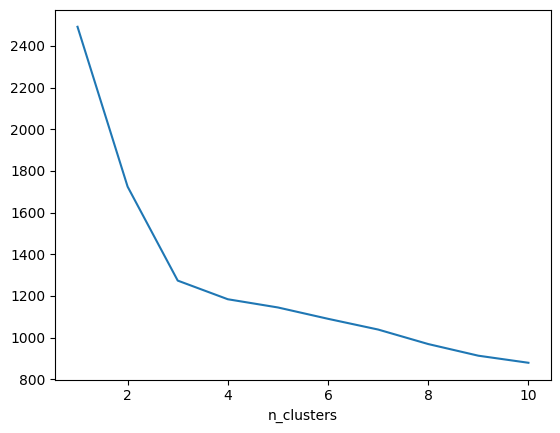

In [97]:
plt.plot(range(1,11),inertia)
plt.xlabel('n_clusters')

In [98]:
k_means_original = KMeans(n_clusters=3)
k_means_original.fit(df_scaled)

KMeans(n_clusters=3)

In [99]:
cluster_org = k_means_original.labels_
pd.DataFrame(cluster_org).value_counts()

,count
0,
2,67
1,62
0,49


In [100]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_cumulative)
    inertia.append(kmeans.inertia_)
print(inertia)

[2287.32406986533, 1520.5370724864838, 1070.9253601300081, 1003.9095602775043, 960.6264934963797, 889.3044129567797, 837.3197084853891, 800.5276875013652, 764.4081000687676, 701.4249818248512]


Text(0.5, 0, 'n_clusters')

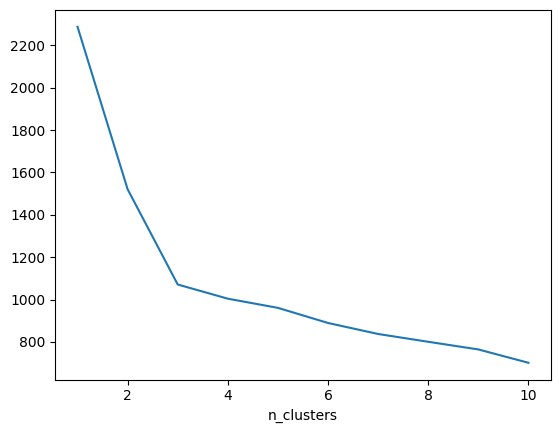

In [101]:
plt.plot(range(1,11),inertia)
plt.xlabel('n_clusters')

In [102]:
k_means_pca1 = KMeans(n_clusters=3)
k_means_pca1.fit(pca_cumulative)

KMeans(n_clusters=3)

In [103]:
cluster_pca1 = k_means_pca1.labels_
pd.DataFrame(cluster_pca1).value_counts()

,count
0,
1,67
2,62
0,49


In [104]:
k_means_pca2 = KMeans(n_clusters=3)
k_means_pca2.fit(pca_scree)

KMeans(n_clusters=3)

In [105]:
cluster_pca2 = k_means_pca2.labels_
pd.DataFrame(cluster_pca2).value_counts()

,count
0,
2,68
0,61
1,49


In [106]:
df['clusters'] = cluster_pca2

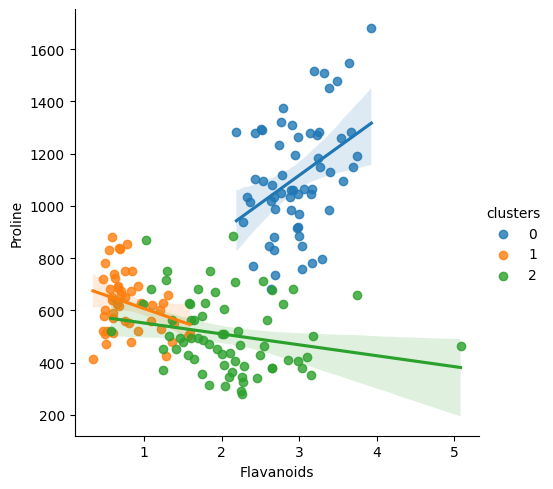

In [107]:
sns.lmplot(data=df,x='Flavanoids',y='Proline',hue='clusters')

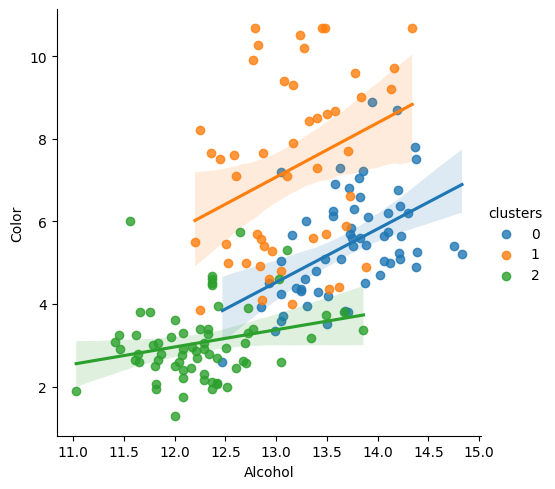

In [108]:
sns.lmplot(data=df,x='Alcohol',y='Color',hue='clusters')

In [109]:
from sklearn.metrics import silhouette_score
silhouette_score(df,k_means_original.labels_)

np.float64(0.20632068225539896)

In [110]:
silhouette_score(pca_cumulative,k_means_pca1.labels_)

np.float64(0.3403993728681126)

In [111]:
silhouette_score(pca_scree,k_means_pca2.labels_)

np.float64(0.43640554388737934)

## **Clustering Results and Insights**

##### **Comparison and Analysis of Clustering Results**

**Original Data (14 Features) :**


```
Cluster 0	Cluster 1	Cluster 2
  67           62         49

```

**PCA Cumulative (8 PCs) :**



```
Cluster 0	Cluster 1	Cluster 2
  62           49         67
  ```
**PCA Scree (4 PCs) :**
```
Cluster 0	Cluster 1	Cluster 2
  61           68         49
  ```

There is not so much difference in clustering on these datasets.

Clustering is stable across the full feature set and PCA variants — the underlying groups are real.

## **Silhouette Score**
**Original: 0.2063** :- Weak clusters; significant overlap or poor separation.

**PCA(8): 0.3403** :- Moderate cluster separation; a significant improvement.

**PCA(4): 0.4364** :- Best performance; well-separated, distinct clusters.

#### **Similarities**

**Stable Cluster Size:** The fundamental three-cluster structure (approximating sizes 68, 61, and 49 samples) is preserved across all three methods.

**Cluster Identity:** While the cluster labels (0, 1, 2) are swapped between the Original and PCA Cumulative results (e.g., Original's Cluster 0 becomes PCA's Cluster 2), the sizes are identical ({67,62,49}). This confirms that PCA successfully retained the core structure of the underlying data groups.


**Dimensionality Reduction is Effective:** The original 14 features of the wine dataset are highly redundant, and their essential variance can be captured by 4 to 8 Principal Components.

